In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load dataset
(X_train,_),(X_test,_)=tf.keras.datasets.mnist.load_data()

In [3]:
#normalise pixel values between 0&1
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.

In [4]:
#reshape the input images
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

In [5]:
#define the autoencoder model
input_dim=X_train.shape[1]
encoding_dim=32
input_img=tf.keras.Input(shape=(input_dim,))
encoded=tf.keras.layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=tf.keras.layers.Dense(input_dim,activation='sigmoid')(encoded)
autoencoder=tf.keras.Model(input_img,decoded)

In [6]:
#compile the autoencoder model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [7]:
#train the autoencoder
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,shuffle=True,
                validation_data=(X_test,X_test))

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2752 - val_loss: 0.1891
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1703 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1340
Epoch 4/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1285 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1181 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1113 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1027 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0999 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0978 - val_loss: 0.0957

In [8]:
#use autoencoder to reconstruct x ray image
reconstructed_images=autoencoder.predict(X_test)

313/313 [==============================] - 0s 497us/step


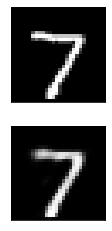

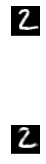

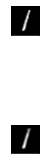

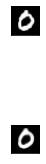

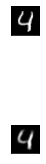

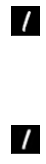

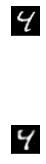

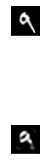

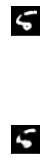

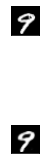

In [10]:
#plot the original and reconstructed images 
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1) #display original images
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n) #display reconstructed images
    plt.imshow(reconstructed_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()